In [1]:
from dataclasses import dataclass
import erdantic as erd

In [2]:
from model.extraction.input import EnergyUse
from model.extraction.input import Employment

In [3]:
from model.transformation.efficiency import Efficiency
from model.transformation.structure import Structure

In [4]:
from model.dissipation.output import NeedSatisfaction, Accumulation, HumanDevelopment
from model.dissipation.distribution import EconomicInequality, GenderInequality, ProfitStructure

In [5]:
@dataclass
class Extraction:
    energy_use: EnergyUse
    employment: Employment


@dataclass
class Transformation:
    efficiency: Efficiency
    structure: Structure


@dataclass
class DissipationOutput:
    need_satisfaction: NeedSatisfaction
    accumulation: Accumulation
    human_development: HumanDevelopment


@dataclass
class DissipationDistribution:
    economic_inequality: EconomicInequality
    gender_inequality: GenderInequality
    profit_structure: ProfitStructure

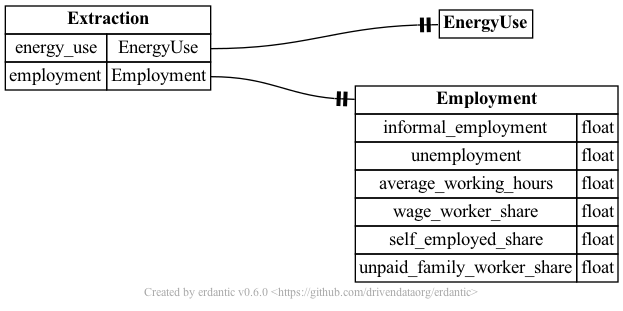

In [6]:
extraction_diagram = erd.create(Extraction)
extraction_diagram

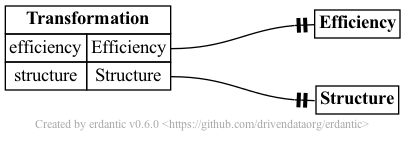

In [7]:
transformation_diagram = erd.create(Transformation)
transformation_diagram

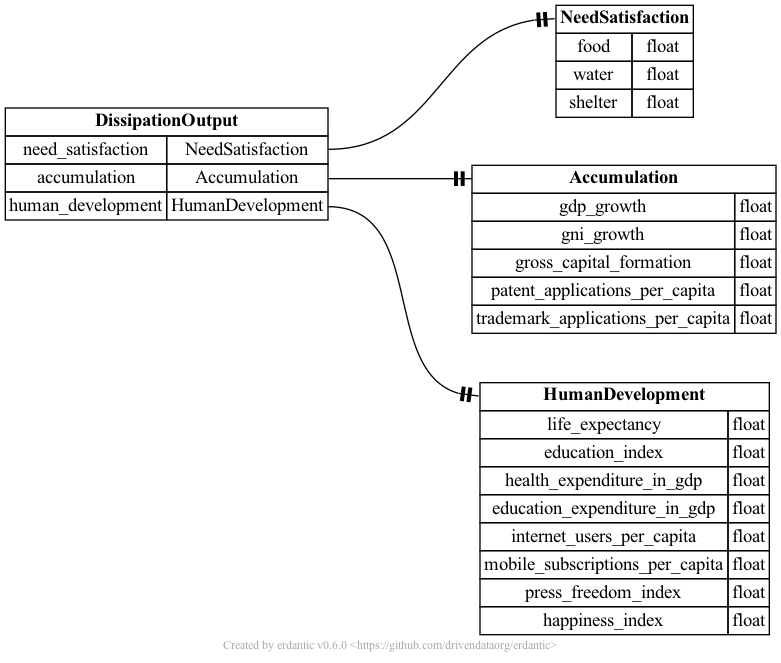

In [8]:
dissipation_diagram = erd.create(DissipationOutput)
dissipation_diagram

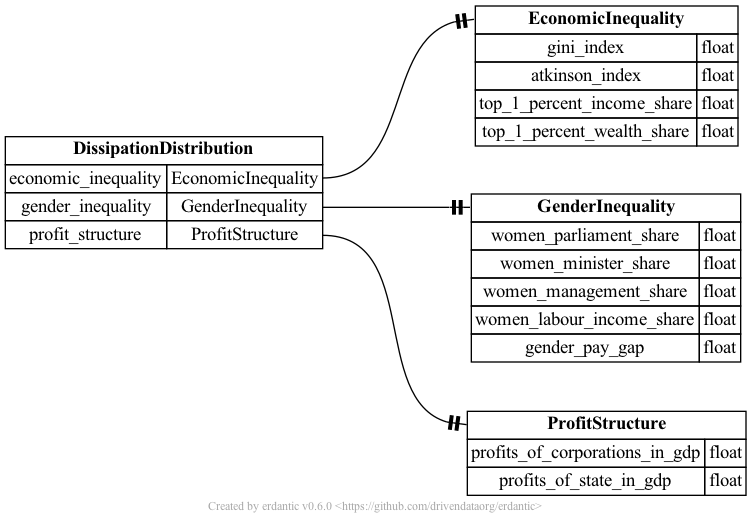

In [9]:
dissipation_distribution_diagram = erd.create(DissipationDistribution)
dissipation_distribution_diagram

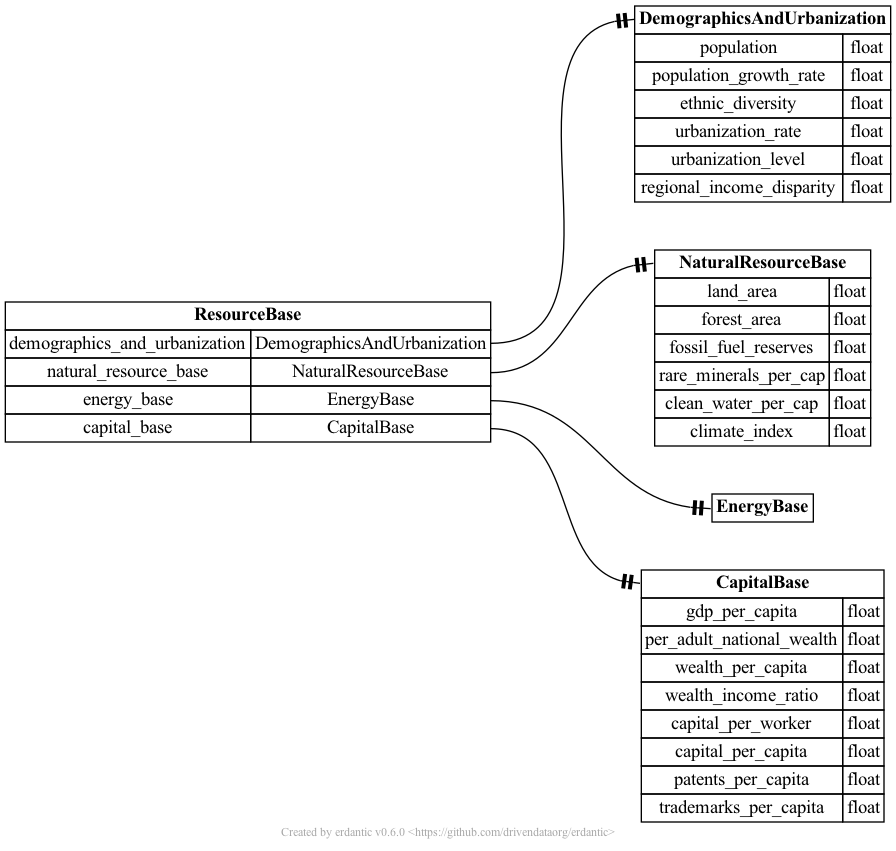

In [10]:
from model.resource_base.capital import CapitalBase
from model.resource_base.energy import EnergyBase
from model.resource_base.people import DemographicsAndUrbanization
from model.resource_base.other import NaturalResourceBase


@dataclass
class ResourceBase:
    demographics_and_urbanization: DemographicsAndUrbanization
    natural_resource_base: NaturalResourceBase
    energy_base: EnergyBase
    capital_base: CapitalBase


resource_base_diagram = erd.create(ResourceBase)
resource_base_diagram

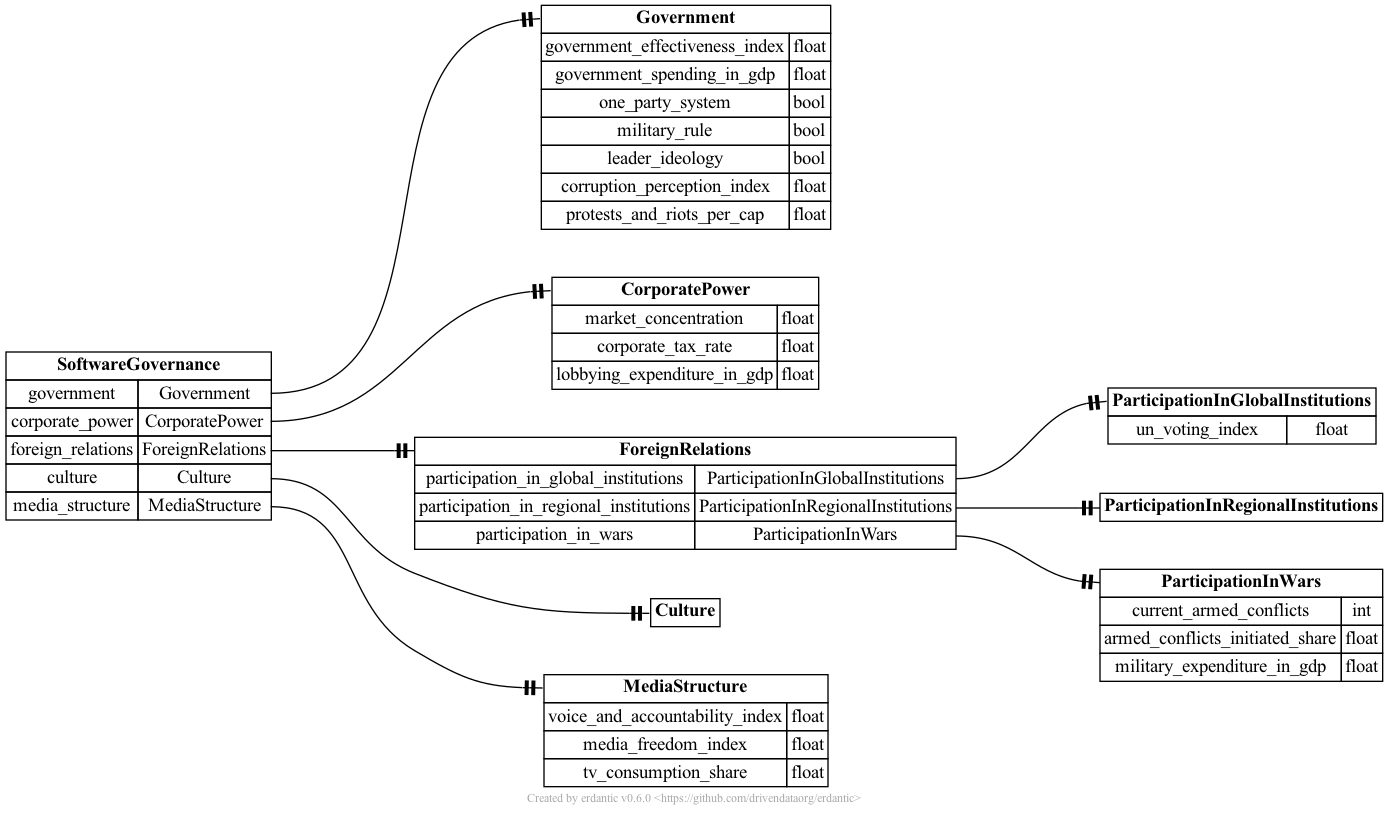

In [11]:
from model.software_governance.state import Government, CorporatePower
from model.software_governance.foreign_relations import ForeignRelations
from model.software_governance.culture import Culture
from model.software_governance.communication import MediaStructure


@dataclass
class SoftwareGovernance:
    government: Government
    corporate_power: CorporatePower
    foreign_relations: ForeignRelations
    culture: Culture
    media_structure: MediaStructure


decision_making_diagram = erd.create(SoftwareGovernance)
decision_making_diagram

In [12]:
@dataclass
class Provisioning:
    resource_base: ResourceBase
    extraction: Extraction
    transformation: Transformation
    dissipation_output: DissipationOutput
    dissipation_distribution: DissipationDistribution
    software_governance: SoftwareGovernance

In [13]:
from utils.image import concatenate_images_horizontally, save_erdantic_diagram

diagrams = [
    resource_base_diagram,
    extraction_diagram,
    transformation_diagram,
    dissipation_diagram,
    dissipation_distribution_diagram,
    decision_making_diagram
]
output_path = 'provisioning.png'

img_paths = []
counter = 0
for diagram in diagrams:
    img_path = save_erdantic_diagram(diagram, f'provisioning_{counter}')
    img_paths.append(img_path)
    counter += 1

concatenate_images_horizontally(img_paths, output_path)